Quantum Computing Project

In [2]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [32]:
n=5 #length of the string
circuit=QuantumCircuit(n+1,n)

In [33]:
circuit.x(5) #flipping the ancilla bit(q5) from 0 to 1
circuit.h(range(0,6)) #Superposing all the qubit (H^tensor product 6 times)
circuit.barrier(range(0,6))
#Adding the CNOT gates to from qubits to ancilla for the phase kickback
circuit.cnot(1,5)
circuit.cnot(2,5)
circuit.cnot(4,5)
circuit.barrier(range(0,6))
circuit.h(range(0,5)) #Applying again H operation across all to get bits as either |0> or |1>
circuit.measure(range(5),range(5))

C:\Users\vitz2\AppData\Local\Temp\ipykernel_17812\3653164134.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(1,5)
C:\Users\vitz2\AppData\Local\Temp\ipykernel_17812\3653164134.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(2,5)
C:\Users\vitz2\AppData\Local\Temp\ipykernel_17812\3653164134.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(4,5)


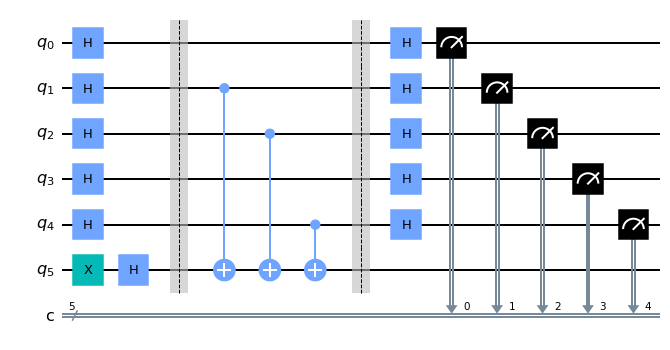

In [34]:
circuit.draw(output='mpl')

In [35]:
backend=AerSimulator()
circ_compl=transpile(circuit,backend)
job=backend.run(circ_compl,shots=1024) #no. of trials = 1024
res=job.result()
counts=res.get_counts(circ_compl)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

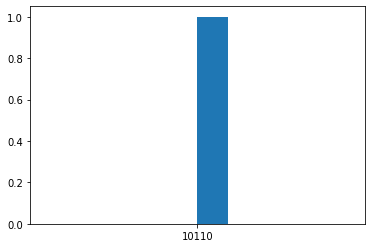

In [36]:
plt.hist(counts) #plotting a histogram for the counts

In [453]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector, random_statevector
import matplotlib.pyplot as plt
import numpy as np

In [454]:
qc=QuantumCircuit(3,3) #Initializing a circuit with 3 quantum and 3 classcial registers
varphi=Statevector([1/np.sqrt(2),-1j/np.sqrt(2)]) #qubit to be teleported
qc.initialize(varphi,0)
varphi.draw(output='latex')

<IPython.core.display.Latex object>

In [455]:
qc.h(1)
qc.cx(1,2) #The initial EPR
qc.barrier()
qc.cx(0,1) #Etangling our input qubit with the EPR
qc.h(0)
qc.barrier()
#The controlled NOT and Z gate to work with specific condition of when the immediate output is 1
qc.cx(1,2)
qc.cz(0,2)
qc.barrier()
#Resetting the unrequired bits back to |0>
qc.h(0)
qc.h(1)

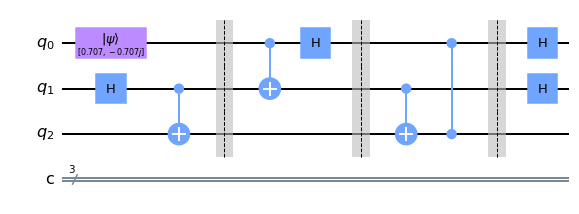

In [456]:
qc.draw(output='mpl')

In [457]:
backend=StatevectorSimulator()
job=backend.run(qc)
res=job.result()
output=res.get_statevector(qc,decimals=9)
output.draw('latex')

<IPython.core.display.Latex object>

In [459]:
qc1=QuantumCircuit(3,3)
varphi=random_statevector(2) #random_statevector(n) gives an input using n qubit states with random amplitudes
qc1.initialize(varphi,0)
varphi.draw(output='latex')

<IPython.core.display.Latex object>

In [460]:
qc1.h(1)
qc1.cx(1,2)
qc1.barrier()
qc1.cx(0,1)
qc1.h(0)
qc1.barrier()
qc1.cx(1,2)
qc1.cz(0,2)
qc1.barrier()
qc1.h(0)
qc1.h(1)

C:\Users\vitz2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


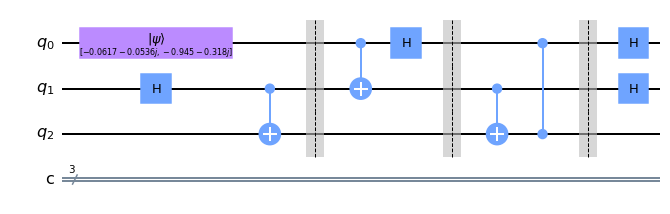

In [461]:
qc1.draw(output='mpl')

In [462]:
backend=StatevectorSimulator()
job=backend.run(qc1)
res=job.result()
output=res.get_statevector(qc1,decimals=9)
output.draw('latex')

<IPython.core.display.Latex object>

In [463]:
qc2=QuantumCircuit(3,3)
varphi=Statevector([1/np.sqrt(2),1/np.sqrt(2)]) #Last verification using the |+> qubit
qc2.initialize(varphi,0)
varphi.draw(output='latex')

<IPython.core.display.Latex object>

In [464]:
qc2.h(1)
qc2.cx(1,2)
qc2.barrier()
qc2.cx(0,1)
qc2.h(0)
qc2.barrier()
qc2.cx(1,2)
qc2.cz(0,2)
qc2.barrier()
qc2.h(0)
qc2.h(1)

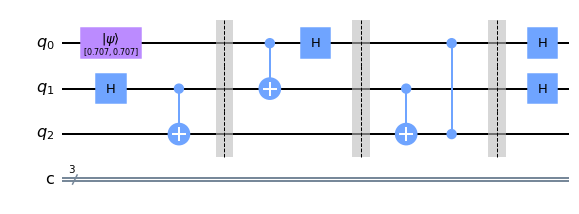

In [465]:
qc2.draw(output='mpl')

In [466]:
backend=StatevectorSimulator()
job=backend.run(qc2)
res=job.result()
output=res.get_statevector(qc2,decimals=9)
output.draw('latex')

<IPython.core.display.Latex object>